# XP Data Science - Semana 2 - Pandas

## Importando os as bibliotecas

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

## Carregando os dados em um dataframe

In [238]:
df_treino = pd.read_csv('train.csv')
df_treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [239]:
df_test = pd.read_csv('test.csv')
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


## Juntando os dataframes (merge)

In [240]:
df_total = pd.merge(df_treino, df_test, how='outer')
df_total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Take an overview of the data

In [241]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [242]:
df_total.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Existem colunas *sem* dados

In [243]:
df_total.isna().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

## Limpando os dados

### Nomes

In [244]:
# Coluna Nome pode ser quebrada pra melhor organização 
df_total.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [245]:
df_total[['Name']]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
1304,"Spector, Mr. Woolf"
1305,"Oliva y Ocana, Dona. Fermina"
1306,"Saether, Mr. Simon Sivertsen"
1307,"Ware, Mr. Frederick"


In [246]:
df_total.Name[0]

'Braund, Mr. Owen Harris'

In [247]:
df_total.Name[0].split(',')

['Braund', ' Mr. Owen Harris']

In [248]:
df_total.Name[0].split(',')[1]

' Mr. Owen Harris'

In [249]:
df_total.Name[0].split(',')[1].split('.')

[' Mr', ' Owen Harris']

In [250]:
df_total.Name[0].split(',')[1].split('.')[0].strip()

'Mr'

In [251]:
# Lets seperate the titles from the name
coltitle = df_total['Name'].apply(
    lambda s: pd.Series(
        {
            'Title': s.split(',')[1].split('.')[0].strip(),
            'LastName': s.split(',')[0].strip(),
            'FirstName': s.split(',')[1].split('.')[1].strip()
        }
    ))
coltitle

,Title,LastName,FirstName
0,Mr,Braund,Owen Harris
1,Mrs,Cumings,John Bradley (Florence Briggs Thayer)
2,Miss,Heikkinen,Laina
3,Mrs,Futrelle,Jacques Heath (Lily May Peel)
4,Mr,Allen,William Henry
...,...,...,...
1304,Mr,Spector,Woolf
1305,Dona,Oliva y Ocana,Fermina
1306,Mr,Saether,Simon Sivertsen
1307,Mr,Ware,Frederick


In [252]:
# Adicionando as colunas novas ao dataframe
df_total = pd.concat([df_total, coltitle], axis=1) 
df_total.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,FirstName
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,Laina


In [253]:
# Removendo a coluna Name
df_total.drop('Name', axis=1, inplace=True)
df_total.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,FirstName
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,Owen Harris
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,Laina


In [254]:
# Vendo a quantidade por Sexo
df_total.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [255]:
# Condigurando um estilo de plot
print (style.available)
style.use('bmh')

['dark_background', 'bmh', 'seaborn-dark', 'seaborn-colorblind', 'seaborn-pastel', 'seaborn-muted', 'seaborn-whitegrid', 'classic', 'seaborn-paper', 'ggplot', 'seaborn-dark-palette', 'seaborn-notebook', 'tableau-colorblind10', 'seaborn-darkgrid', 'seaborn-deep', '_classic_test', 'grayscale', 'seaborn-white', 'fast', 'seaborn-poster', 'seaborn', 'seaborn-talk', 'seaborn-ticks', 'fivethirtyeight', 'Solarize_Light2', 'seaborn-bright']


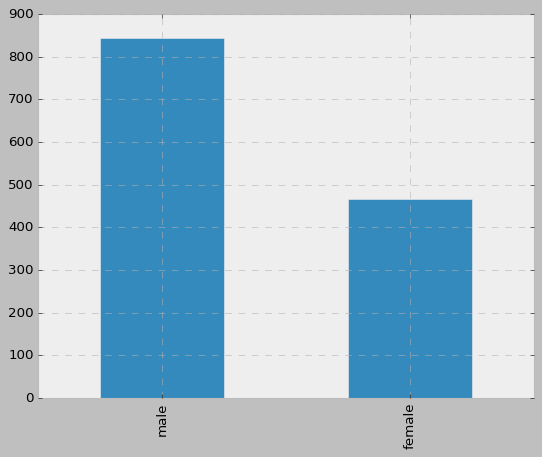

In [256]:
# Vendo gráficamente
df_total.Sex.value_counts().plot(kind='bar')
plt.show()

In [257]:
# Vamos verificar o número de vítimas no navio
df_total.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

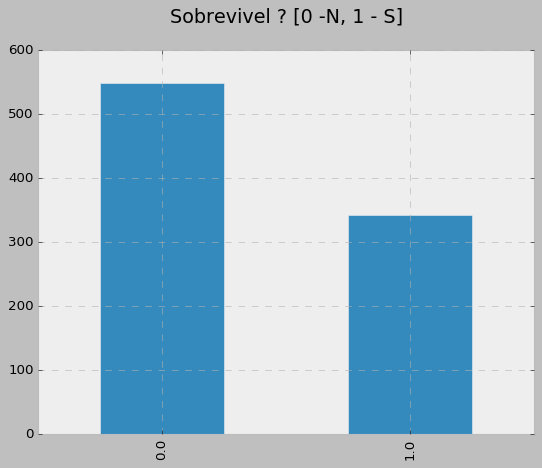

In [258]:
# Vendo gráficamente
df_total.Survived.value_counts().plot(kind='bar', title='Sobrevivel ? [0 -N, 1 - S]\n')
plt.show()

## Estudando as quantifdades por títulos

In [259]:
# Vendo quantos titulos temos
df_total.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [260]:
df_total.loc[df_total['Title']=='Mlle', 'Title']

641    Mlle
710    Mlle
Name: Title, dtype: object

In [261]:
df_total[df_total.Title == 'Mlle']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,FirstName
641,642,1.0,1,female,24.0,0,0,PC 17477,69.3000,B35,C,Mlle,Sagesser,Emma
710,711,1.0,1,female,24.0,0,0,PC 17482,49.5042,C90,C,Mlle,Mayne,"Berthe Antonine (""Mrs de Villiers"")"


In [262]:
df_total[df_total.Title == 'Mlle'].Title

641    Mlle
710    Mlle
Name: Title, dtype: object

In [263]:
df_total.loc[df_total['Title']=='Mlle', 'Title']='Miss'.strip()

In [264]:
df_total.loc[df_total['Title']=='Mlle', 'Title']

Series([], Name: Title, dtype: object)

In [265]:
df_total.loc[df_total['Title']=='Miss', 'Title']

2       Miss
10      Miss
11      Miss
14      Miss
22      Miss
        ... 
1293    Miss
1299    Miss
1300    Miss
1301    Miss
1303    Miss
Name: Title, Length: 262, dtype: object

In [266]:
df_total[df_total.Title == 'Ms'].Title

443    Ms
979    Ms
Name: Title, dtype: object

In [267]:
# Modificando os titulos
df_total[df_total.Title == 'Ms'].Title='Miss'.strip()

/home/gabriel/.virtualenvs/codenation/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [268]:
df_total[df_total.Title == 'Ms'].Title

443    Ms
979    Ms
Name: Title, dtype: object

In [269]:
# Modificando os titulos
df_total.loc[df_total['Title']=='Ms', 'Title']='Miss'.strip()
df_total.loc[df_total['Title']=='Mme', 'Title']='Mrs'.strip()

In [270]:
# Passeiros por sexo e titulo
tab = df_total.groupby(['Sex', 'Title']).size()
print(tab)

Sex     Title       
female  Dona              1
        Dr                1
        Lady              1
        Miss            264
        Mrs             198
        the Countess      1
male    Capt              1
        Col               4
        Don               1
        Dr                7
        Jonkheer          1
        Major             2
        Master           61
        Mr              757
        Rev               8
        Sir               1
dtype: int64


In [271]:
# Sobrenomes diferentes
df_total.LastName.unique().shape[0]

875

## Quantas famílias ?

In [272]:
df_total.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,FirstName
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,Owen Harris
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,Laina
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,Jacques Heath (Lily May Peel)
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,William Henry
5,6,0.0,3,male,NaN,0,0,330877,8.4583,NaN,Q,Mr,Moran,James
6,7,0.0,1,male,54.0,0,0,17463,51.8625,E46,S,Mr,McCarthy,Timothy J
7,8,0.0,3,male,2.0,3,1,349909,21.0750,NaN,S,Master,Palsson,Gosta Leonard
8,9,1.0,3,female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Johnson,Oscar W (Elisabeth Vilhelmina Berg)
9,10,1.0,2,female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Nasser,Nicholas (Adele Achem)


In [273]:
# Crio uma coluna nova de familiares (incluindo EU)
df_total['total_members'] = df_total.SibSp + df_total.Parch + 1
df_total.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,FirstName,total_members
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,Owen Harris,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,John Bradley (Florence Briggs Thayer),2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,Laina,1


## Morreu a família toda ?

In [274]:
df_total[['Survived', 'total_members']].sort_values(by=["total_members","Survived"]).sample(10)

,Survived,total_members
747,1.0,1
821,1.0,1
501,0.0,1
880,1.0,2
857,1.0,1
1009,NaN,1
548,0.0,3
559,1.0,2
939,NaN,1
466,0.0,1


In [275]:
df_total[['Survived', 'total_members']].groupby('total_members')

In [276]:
df_total[['Survived', 'total_members']].groupby('total_members').count()

,Survived
total_members,
1,537
2,161
3,102
4,29
5,15
6,22
7,12
8,6
11,7


In [277]:
df_total[['Survived', 'total_members']].groupby('total_members').sum()

,Survived
total_members,
1,163.0
2,89.0
3,59.0
4,21.0
5,3.0
6,3.0
7,4.0
8,0.0
11,0.0


In [278]:
df_total[['Survived', 'total_members']].groupby('total_members').mean()

,Survived
total_members,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [279]:
survivor = df_total[['Survived', 'total_members']].groupby('total_members').mean()
survivor.head(10)

,Survived
total_members,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


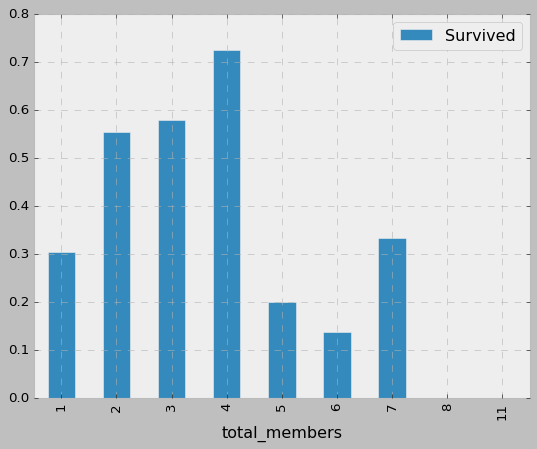

In [280]:
survivor.plot(kind='bar')
plt.show()

# Muitas gente ou sozinho

## Olhando ainda mais para os dados

In [281]:
df_total.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,FirstName,total_members
188,189,0.0,3,male,40.0,1,1,364849,15.5,NaN,Q,Mr,Bourke,John,3
1109,1110,NaN,1,female,50.0,1,1,113503,211.5,C80,C,Mrs,Widener,George Dunton (Eleanor Elkins),3
475,476,0.0,1,male,NaN,0,0,110465,52.0,A14,S,Mr,Clifford,George Quincy,1


In [282]:
df_total.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Sex                 0
Age               263
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin            1014
Embarked            2
Title               0
LastName            0
FirstName           0
total_members       0
dtype: int64

In [283]:
df_total.Ticket.describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

In [284]:
df_total.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [285]:
df_total.Cabin.describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [286]:
# Removendo as colunsa
df_total.drop('Cabin', axis=1, inplace=True)
df_total.drop('Ticket', axis=1, inplace=True)
df_total.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
496,497,1.0,1,female,54.0,1,0,78.2667,C,Miss,Eustis,Elizabeth Mussey,2
521,522,0.0,3,male,22.0,0,0,7.8958,S,Mr,Vovk,Janko,1
699,700,0.0,3,male,42.0,0,0,7.6500,S,Mr,Humblen,Adolf Mathias Nicolai Olsen,1


In [287]:
# Vendo a Taxa 
df_total[df_total.Fare.isnull()==True]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
1043,1044,NaN,3,male,60.5,0,0,NaN,S,Mr,Storey,Thomas,1


## Preenchendo esse valor

In [288]:
#  Media de Taxa por Classe
df_total[['Pclass', 'Fare']].groupby('Pclass').mean()

,Fare
Pclass,
1,87.508992
2,21.179196
3,13.302889


In [289]:
df_total.loc[df_total.PassengerId==1044.0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
1043,1044,NaN,3,male,60.5,0,0,NaN,S,Mr,Storey,Thomas,1


In [290]:
df_total.loc[df_total.PassengerId==1044.0, 'Fare']=13.30

In [291]:
df_total.loc[df_total.PassengerId==1044.0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
1043,1044,NaN,3,male,60.5,0,0,13.3,S,Mr,Storey,Thomas,1


In [292]:
# Verificando os valores Nulos onde embarcou
df_total.Embarked.isnull().sum()

2

In [293]:
df_total[df_total['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
61,62,1.0,1,female,38.0,0,0,80.0,NaN,Miss,Icard,Amelie,1
829,830,1.0,1,female,62.0,0,0,80.0,NaN,Mrs,Stone,George Nelson (Martha Evelyn),1


In [294]:
# Quem sobreviveu embarcou onde ?
df_total[['Embarked', 'Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


## Vamos do maior

In [295]:
# Quem tem Local de embarque vazio
df_total.loc[df_total['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
61,62,1.0,1,female,38.0,0,0,80.0,NaN,Miss,Icard,Amelie,1
829,830,1.0,1,female,62.0,0,0,80.0,NaN,Mrs,Stone,George Nelson (Martha Evelyn),1


In [296]:
# Encontrando a Taxa por local de embarcação
df_total[['Embarked', 'Fare']].groupby('Embarked').mean()

,Fare
Embarked,
C,62.336267
Q,12.409012
S,27.403377


In [297]:
# Preencher
df_total.loc[df_total['Embarked'].isnull() == True, 'Embarked']='C'.strip()

## Verificando idades vazias

In [298]:
df_total.Age.isnull().sum()

263

In [299]:
df_total[df_total.Age.isnull()].head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
5,6,0.0,3,male,NaN,0,0,8.4583,Q,Mr,Moran,James,1
17,18,1.0,2,male,NaN,0,0,13.0000,S,Mr,Williams,Charles Eugene,1
19,20,1.0,3,female,NaN,0,0,7.2250,C,Mrs,Masselmani,Fatima,1


In [300]:
df_total.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

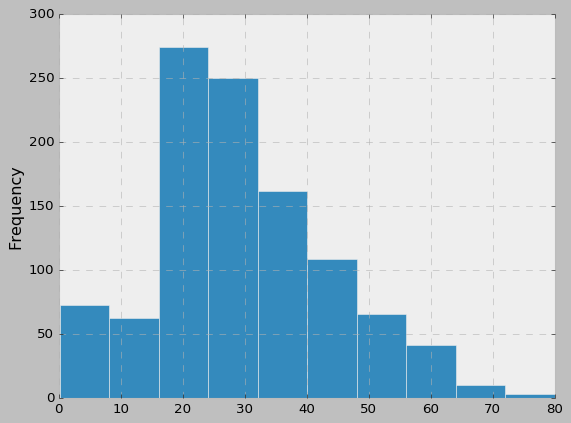

In [301]:
df_total.Age.plot(kind='hist')
plt.show()

##  Podemos achar a idade pelo Titulo, Sexo e Classe

In [302]:
pd.pivot_table(df_total, index=['Sex', 'Title', 'Pclass'], values=['Age'], aggfunc=['mean','median','max','min'])

mean median   max    min
                                  Age    Age   Age    Age
Sex    Title        Pclass                               
female Dona         1       39.000000   39.0  39.0  39.00
       Dr           1       49.000000   49.0  49.0  49.00
       Lady         1       48.000000   48.0  48.0  48.00
       Miss         1       30.131148   30.0  63.0   2.00
                    2       20.865714   20.0  50.0   0.92
                    3       17.360874   18.0  45.0   0.17
       Mrs          1       42.926471   45.0  76.0  17.00
                    2       33.518519   30.5  60.0  14.00
                    3       32.326531   31.0  63.0  15.00
       the Countess 1       33.000000   33.0  33.0  33.00
male   Capt         1       70.000000   70.0  70.0  70.00
       Col          1       54.000000   54.5  60.0  47.00
       Don          1       40.000000   40.0  40.0  40.00
       Dr           1       44.750000   47.0  53.0  32.00
                    2       38.500000   38.5  54.0  23.00
       Jonkheer     1       38.000000   38.0  38.0  38.00
       Major        1       48.500000   48.5  52.0  45.00
       Master       1        6.984000    6.0  13.0   0.92
                    2        2.757273    2.0   8.0   0.67
                    3        6.090000    6.0  14.5   0.33
       Mr           1       41.450758   41.5  80.0  17.00
                    2       32.346715   30.0  70.0  14.00
                    3       28.318910   26.0  74.0  11.00
       Rev          2       41.250000   41.5  57.0  27.00
       Sir          1       49.000000   49.0  49.0  49.00

## FUNÇÃO !!!

In [303]:
# Uma linda funcção que preenche as idades
def fillAges(row):
    
    if row['Sex']=='female' and row['Pclass'] == 1:
        if row['Title'] == 'Miss':
            return 29.5
        elif row['Title'] == 'Mrs':
            return 38.0
        elif row['Title'] == 'Dr':
            return 49.0
        elif row['Title'] == 'Lady':
            return 48.0
        elif row['Title'] == 'the Countess':
            return 33.0

    elif row['Sex']=='female' and row['Pclass'] == 2:
        if row['Title'] == 'Miss':
            return 24.0
        elif row['Title'] == 'Mrs':
            return 32.0

    elif row['Sex']=='female' and row['Pclass'] == 3:
        
        if row['Title'] == 'Miss':
            return 9.0
        elif row['Title'] == 'Mrs':
            return 29.0

    elif row['Sex']=='male' and row['Pclass'] == 1:
        if row['Title'] == 'Master':
            return 4.0
        elif row['Title'] == 'Mr':
            return 36.0
        elif row['Title'] == 'Sir':
            return 49.0
        elif row['Title'] == 'Capt':
            return 70.0
        elif row['Title'] == 'Col':
            return 58.0
        elif row['Title'] == 'Don':
            return 40.0
        elif row['Title'] == 'Dr':
            return 38.0
        elif row['Title'] == 'Major':
            return 48.5

    elif row['Sex']=='male' and row['Pclass'] == 2:
        if row['Title'] == 'Master':
            return 1.0
        elif row['Title'] == 'Mr':
            return 30.0
        elif row['Title'] == 'Dr':
            return 38.5

    elif row['Sex']=='male' and row['Pclass'] == 3:
        if row['Title'] == 'Master':
            return 4.0
        elif row['Title'] == 'Mr':
            return 22.0

In [304]:
df_total.Age[0]

22.0

In [305]:
np.isnan(df_total.Age[0])

False

In [306]:
df_total['Age'] = df_total.apply(lambda s: fillAges(s) if np.isnan(s['Age']) else s['Age'], axis=1)

In [307]:
df_total.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
0,1,0.0,3,male,22.0,1,0,7.2500,S,Mr,Braund,Owen Harris,2
1,2,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Cumings,John Bradley (Florence Briggs Thayer),2
2,3,1.0,3,female,26.0,0,0,7.9250,S,Miss,Heikkinen,Laina,1
3,4,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Futrelle,Jacques Heath (Lily May Peel),2
4,5,0.0,3,male,35.0,0,0,8.0500,S,Mr,Allen,William Henry,1
5,6,0.0,3,male,22.0,0,0,8.4583,Q,Mr,Moran,James,1
6,7,0.0,1,male,54.0,0,0,51.8625,S,Mr,McCarthy,Timothy J,1
7,8,0.0,3,male,2.0,3,1,21.0750,S,Master,Palsson,Gosta Leonard,5
8,9,1.0,3,female,27.0,0,2,11.1333,S,Mrs,Johnson,Oscar W (Elisabeth Vilhelmina Berg),3
9,10,1.0,2,female,14.0,1,0,30.0708,C,Mrs,Nasser,Nicholas (Adele Achem),2


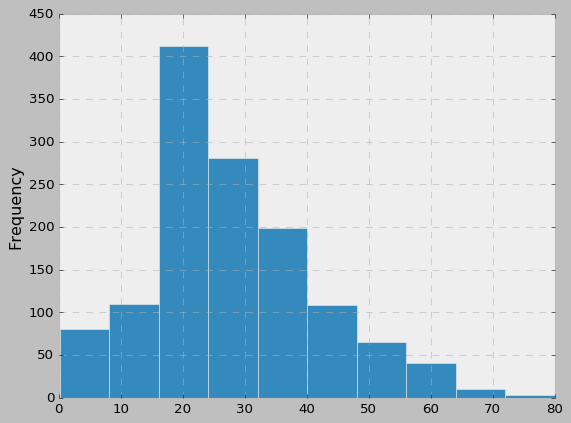

In [308]:
df_total.Age.plot(kind='hist')
plt.show()

# Prevendo os sobreviventes !

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [310]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 13 columns):
PassengerId      1309 non-null int64
Survived         891 non-null float64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Fare             1309 non-null float64
Embarked         1309 non-null object
Title            1309 non-null object
LastName         1309 non-null object
FirstName        1309 non-null object
total_members    1309 non-null int64
dtypes: float64(3), int64(5), object(5)
memory usage: 183.2+ KB


## Fazendo as conversões de objeto para númerico

In [311]:
df_total.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
211,212,1.0,2,female,35.0,0,0,21.00,S,Miss,Cameron,Clear Annie,1
80,81,0.0,3,male,22.0,0,0,9.00,S,Mr,Waelens,Achille,1
1159,1160,NaN,3,female,9.0,0,0,8.05,S,Miss,Howard,May Elizabeth,1


In [312]:
# Sexo de 0 para 1
def trans_sex(x):
    if x == 'female':
        return 0
    else:
        return 1


# Convert Embarked to 1, 2, 3 (S, C, Q)
def trans_embark(x):
    if x == 'S':
        return 3
    if x == 'C':
        return 2
    if x == 'Q':
        return 1


In [313]:
df_total['Sex'] = df_total['Sex'].apply(trans_sex)

In [314]:
df_total.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
1041,1042,NaN,1,0,23.0,0,1,83.1583,C,Mrs,Earnshaw,Boulton (Olive Potter),2
38,39,0.0,3,0,18.0,2,0,18.0000,S,Miss,Vander Planke,Augusta Maria,3
82,83,1.0,3,0,9.0,0,0,7.7875,Q,Miss,McDermott,Brigdet Delia,1


In [315]:
df_total['Embarked'] = df_total['Embarked'].apply(trans_embark)

In [316]:
df_total.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members
99,100,0.0,2,1,34.0,1,0,26.0000,3,Mr,Kantor,Sinai,2
997,998,NaN,3,1,21.0,0,0,7.8208,1,Mr,Buckley,Daniel,1
27,28,0.0,1,1,19.0,3,2,263.0000,3,Mr,Fortune,Charles Alexander,6


In [317]:
df_total.Sex.unique()

array([1, 0])

In [318]:
df_total.Embarked.unique()

array([3, 2, 1])

In [319]:
# Adicionando uma coluna "Filho" ou "Mãe"
df_total['Child'] = 0

In [320]:
df_total.loc[df_total['Age']<18.0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members,Child
7,8,0.0,3,1,2.0,3,1,21.0750,3,Master,Palsson,Gosta Leonard,5,0
9,10,1.0,2,0,14.0,1,0,30.0708,2,Mrs,Nasser,Nicholas (Adele Achem),2,0
10,11,1.0,3,0,4.0,1,1,16.7000,3,Miss,Sandstrom,Marguerite Rut,3,0
14,15,0.0,3,0,14.0,0,0,7.8542,3,Miss,Vestrom,Hulda Amanda Adolfina,1,0
16,17,0.0,3,1,2.0,4,1,29.1250,1,Master,Rice,Eugene,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1295,NaN,1,1,17.0,0,0,47.1000,3,Mr,Carrau,Jose Pedro,1,0
1299,1300,NaN,3,0,9.0,0,0,7.7208,1,Miss,Riordan,"Johanna Hannah""""",1,0
1300,1301,NaN,3,0,3.0,1,1,13.7750,3,Miss,Peacock,Treasteall,3,0
1301,1302,NaN,3,0,9.0,0,0,7.7500,1,Miss,Naughton,Hannah,1,0


In [321]:
df_total.loc[df_total['Age']<18.0, 'Child'] = 1

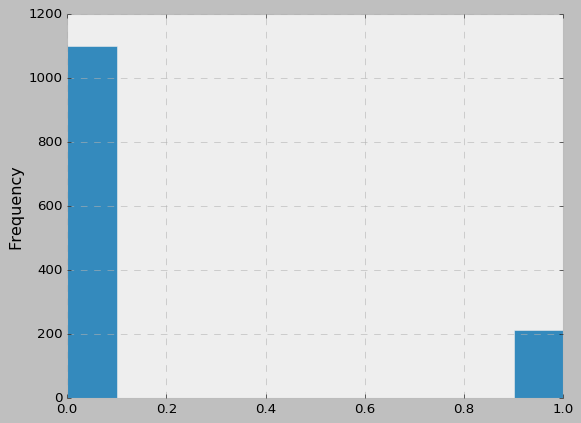

In [322]:
df_total.Child.plot(kind='hist')
plt.show()

In [323]:
# Adicionando uma coluna "Filho" ou "Mãe"
df_total['Mother'] = 0

In [324]:
df_total.loc[(df_total['Age'] > 18.0) & (df_total['Parch'] > 0.0)
             & (df_total['Sex'] == 0) & (df_total['Title'] != 'Miss')]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,LastName,FirstName,total_members,Child,Mother
8,9,1.0,3,0,27.0,0,2,11.1333,3,Mrs,Johnson,Oscar W (Elisabeth Vilhelmina Berg),3,0,0
25,26,1.0,3,0,38.0,1,5,31.3875,3,Mrs,Asplund,Carl Oscar (Selma Augusta Emilia Johansson),7,0,0
98,99,1.0,2,0,34.0,0,1,23.0000,3,Mrs,Doling,John T (Ada Julia Bone),2,0,0
140,141,0.0,3,0,29.0,0,2,15.2458,2,Mrs,Boulos,Joseph (Sultana),3,0,0
166,167,1.0,1,0,38.0,0,1,55.0000,3,Mrs,Chibnall,(Edith Martha Bowerman),2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1257,NaN,3,0,29.0,1,9,69.5500,3,Mrs,Sage,John (Annie Bullen),11,0,0
1259,1260,NaN,1,0,45.0,0,1,59.4000,2,Mrs,Gibson,Leonard (Pauline C Boeson),2,0,0
1265,1266,NaN,1,0,54.0,1,1,81.8583,3,Mrs,Dodge,Washington (Ruth Vidaver),3,0,0
1282,1283,NaN,1,0,51.0,0,1,39.4000,3,Mrs,Lines,Ernest H (Elizabeth Lindsey James),2,0,0


In [325]:
df_total.loc[(df_total['Age'] > 18.0) & (df_total['Parch'] > 0.0) & (
    df_total['Sex'] == 0) & (df_total['Title'] != 'Miss'), 'Mother'] = 1

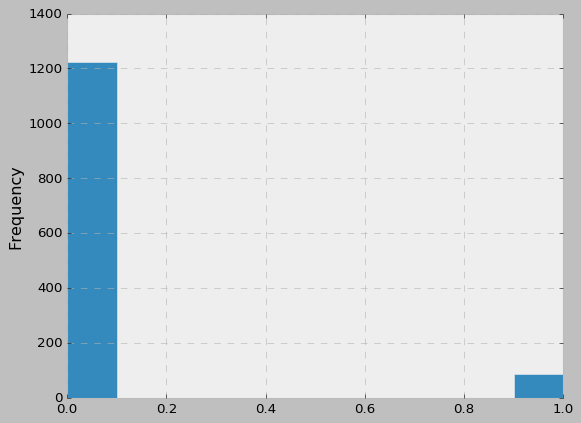

In [326]:
df_total.Mother.plot(kind='hist')
plt.show()

In [327]:
df_total.isnull().sum()

PassengerId        0
Survived         418
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Title              0
LastName           0
FirstName          0
total_members      0
Child              0
Mother             0
dtype: int64

In [328]:
df_total.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,total_members,Child,Mother
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,0.644003,28.315638,0.498854,0.385027,33.280204,2.604278,1.883881,0.160428,0.064935
std,378.020061,0.486592,0.837836,0.478997,13.837380,1.041658,0.865560,51.741831,0.653745,1.583639,0.367143,0.246505
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,2.000000,1.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,3.000000,1.000000,0.000000,0.000000
75%,982.000000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.275000,3.000000,2.000000,0.000000,0.000000
max,1309.000000,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,3.000000,11.000000,1.000000,1.000000


/home/gabriel/.virtualenvs/codenation/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


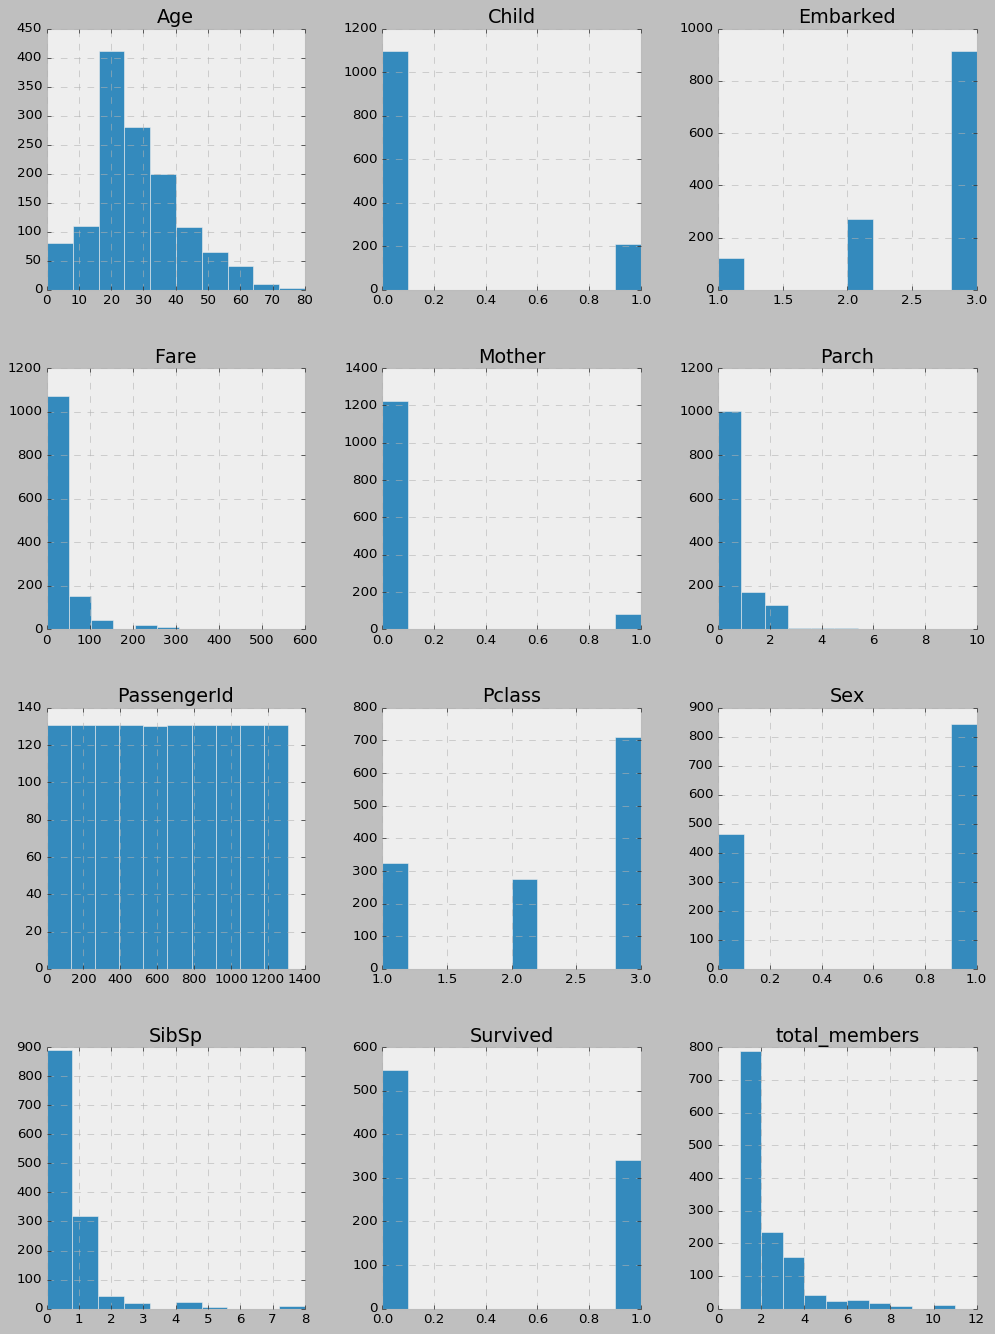

In [329]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_total.hist(ax = ax)
plt.show()

## DIVINDO para CONQUISTAR

In [330]:
# Separando as features e a predição
features_label = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'total_members', 'Child', 'Mother']
target_label= ['Survived']
train = df_total[df_total['Survived'].isnull()!= True]
test = df_total[df_total['Survived'].isnull()== True]

In [331]:
print (train.shape)
print (test.shape)

(891, 15)
(418, 15)


## Floresta Aletoria !!

In [332]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X=train[features_label], y=train[target_label])
Y_pred = random_forest.predict(X=test[features_label])
random_forest.score(X=train[features_label], y=train[target_label])

/home/gabriel/.virtualenvs/codenation/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.978675645342312

## Regredindo 

In [333]:
# Logistic Regression
regr = LogisticRegression()
regr.fit(X=train[features_label], y=train[target_label])
regr.score(X=train[features_label], y=train[target_label])

/home/gabriel/.virtualenvs/codenation/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gabriel/.virtualenvs/codenation/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7991021324354658

# Achando as Roses

In [334]:
predict_t = regr.predict(X=test[features_label])
print (predict_t)

[0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.

In [335]:
# Inserindo os dados que prevemos
df_total.loc[df_total['Survived'].isnull()== True, 'Survived']= predict_t

In [336]:
df_total.Survived.unique()

array([0., 1.])

In [337]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X=train[features_label], y=train[target_label])
# display the relative importance of each attribute
importance = model.feature_importances_
print (importance)

[0.10006054 0.25008876 0.21018249 0.0382113  0.02045913 0.24142315
 0.03977769 0.03915978 0.03893927 0.02169788]


/home/gabriel/.virtualenvs/codenation/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/gabriel/.virtualenvs/codenation/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


               importance
feature                  
Sex                 0.250
Fare                0.241
Age                 0.210
Pclass              0.100
Embarked            0.040
total_members       0.039
Child               0.039
SibSp               0.038
Mother              0.022
Parch               0.020


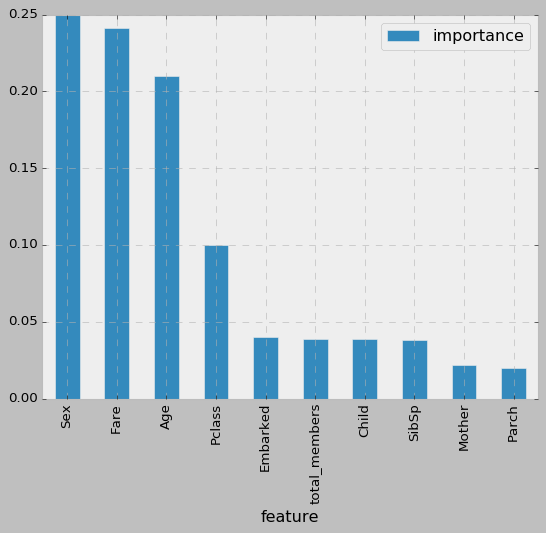

In [338]:
# model is of type array, convert to type dataframe
imp = pd.DataFrame({'feature':features_label,'importance':np.round(model.feature_importances_,3)})
imp = imp.sort_values('importance',ascending=False).set_index('feature')
print (imp)
imp.plot.bar()
plt.show()

In [348]:
print ("\nQuem sobreviveu\n")

print ("\nDistribuição Sexo\n")
print (df_total['Sex'].value_counts()) 
print ("\n---------------------------------------\n")

print ("\nSobreviveu Sexo\n")
print(df_total[['Survived', 'Sex']].groupby('Sex').sum()) 
print ("\n---------------------------------------\n")

print ("\nDistribuição Classe\n")
print (df_total['Pclass'].value_counts())
print ("\n---------------------------------------\n")
       
print("\nSobreviveu  Classe\n")
print(df_total[['Survived', 'Pclass']].groupby('Pclass').sum()) 
print ("\n---------------------------------------\n")

print ("\nDistribuição Mãe\n")
print (df_total['Mother'].value_counts())
print ("\n---------------------------------------\n")
       
print ("\nSobreviveu  Mãe\n")
print (df_total[['Survived', 'Mother']].groupby('Mother').sum())
print ("\n---------------------------------------\n")


Quem sobreviveu


Distribuição Sexo

male      843
female    466
Name: Sex, dtype: int64

---------------------------------------


Sobreviveu Sexo

        Survived
Sex             
female     370.0
male       117.0

---------------------------------------


Distribuição Classe

3    709
1    323
2    277
Name: Pclass, dtype: int64

---------------------------------------


Sobreviveu  Classe

        Survived
Pclass          
1          192.0
2          119.0
3          176.0

---------------------------------------


Distribuição Mãe

0    1224
1      85
Name: Mother, dtype: int64

---------------------------------------


Sobreviveu  Mãe

        Survived
Mother          
0          419.0
1           68.0

---------------------------------------



## Mulheres VIPs e Dat primira Classe Primeiro !!

## Voltando

In [340]:
# Convert sex to 0 and 1 (Female and Male)
def trans_sex(x):
    if x == 0:
        return 'female'
    else:
        return 'male'
df_total['Sex'] = df_total['Sex'].apply(trans_sex)

# Convert Embarked to 1, 2, 3 (S, C, Q)
def trans_embark(x):
    if x == 3:
        return 'S'
    if x == 2:
        return 'C'
    if x == 1:
        return 'Q'
df_total['Embarked'] = df_total['Embarked'].apply(trans_embark)

## Export the data into a CSV file

In [236]:
df_total.to_csv('full.csv')